In [1]:
%matplotlib inline

In [2]:
from LoopStructural import GeologicalModel
from LoopStructural.visualisation import LavaVuModelViewer
from LoopStructural.datasets import load_claudius #demo data

import pandas as pd
import glob
import numpy as np
#import surfe

In [3]:
data = pd.read_excel(r'C:\Users\ASUS\Desktop\loopstructural\data perthbasin\perthbasin.xlsx')

In [4]:
data = data.rename(columns={'azimuth': 'strike', 'formation': 'feature_name'})

In [5]:
print(data)

                 X             Y            Z  val      strike       dip  \
0    393936.142320  6.693633e+06   957.702303    1  263.276747  1.193492   
1    396918.892567  6.693984e+06   977.204803    1   83.276747  0.349367   
2    351487.758871  6.688629e+06 -7385.646697    1   83.277000  6.546000   
3    338518.168564  6.650709e+06 -4542.306605    1  256.590252  1.789915   
4    397464.032464  6.663078e+06   959.378895    1  268.100891  1.432093   
..             ...           ...          ...  ...         ...       ...   
119  353033.649500  6.688811e+06 -5424.239697    5         NaN       NaN   
120  341942.065600  6.651525e+06 -4152.902105    5         NaN       NaN   
121  342823.407600  6.651735e+06 -4152.902105    5         NaN       NaN   
122  337375.397500  6.650011e+06 -1199.239105    5         NaN       NaN   
123  338177.661300  6.650617e+06 -1227.176105    5         NaN       NaN   

     polarity feature_name  
0         1.0      Permian  
1         1.0      Permian  


In [ ]:
data_claudius, bb_claudius = load_claudius()

In [ ]:
print(bb_claudius)

In [6]:
##extent_of_model = np.array([[ 340944.288072, 6637386.,  -7357.485252],
## [ 393936.142320,  6693633.,   957.702303]])

extent_of_model= np.array([[337000,6640000,-18000],  ##taken from extent of model in gempy
[400000,6710000,1000]])


In [7]:
print(extent_of_model[0,:])

[ 337000 6640000  -18000]


In [8]:
print(extent_of_model[1,:])

[ 400000 6710000    1000]


In [9]:
model = GeologicalModel(extent_of_model[0,:],extent_of_model[1,:])

2021-09-16 11:34:15,213 ~ LoopStructural.visualisation.model_visualisation ~ ERROR      ~ Plot area has not been defined.
2021-09-16 11:34:15,213 ~ LoopStructural.visualisation.model_visualisation ~ ERROR      ~ Plot area has not been defined.
2021-09-16 11:34:15,213 ~ LoopStructural.visualisation.model_visualisation ~ ERROR      ~ Plot area has not been defined.



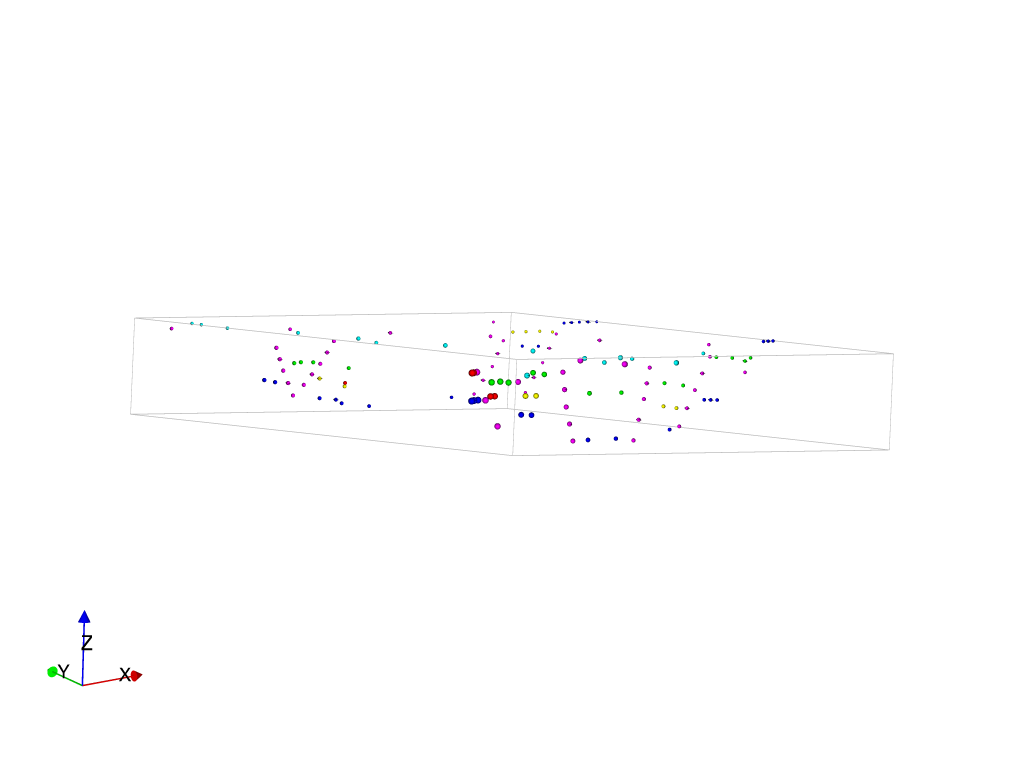

In [10]:
data['feature_name'].unique()

viewer = LavaVuModelViewer(background='white')
viewer.add_value_data(data[~np.isnan(data['val'])][['X','Y','Z']],data[~np.isnan(data['val'])]['val'],name='value points')
viewer.add_vector_data(data[~np.isnan(data['dip'])][['X','Y','Z']],
                       data[~np.isnan(data['strike'])][['X','Y','Z']],name='orientation points')
viewer.rotate([-85.18760681152344, 42.93233871459961, 0.8641873002052307])
viewer.display()

In [19]:
fault_displacement = 400


model.set_model_data(data)




formation_Permian = model.create_and_add_foliation('Permian',
                              interpolatortype='surfe',
                               nelements=1e4,
                               solver='pyamg',
                              method='Laujaunie')
#uc = model.add_unconformity(formation_Permian,1)








formation_Cretaceous   =    model.create_and_add_foliation('Cretaceous',
                              interpolatortype='surfe',
                               nelements=1e4,
                               solver='pyamg',
                             method='Laujaunie'  )



formation_Yarragadee  =    model.create_and_add_foliation('Yarragadee',
                              interpolatortype='surfe',
                               nelements=1e4,
                               solver='pyamg',
                             method='Laujaunie'  )



formation_Lesueur   =     model.create_and_add_foliation('Lesueur',
                              interpolatortype='surfe',
                               nelements=1e4,method='Laujaunie',
                               solver='pyamg'
                              )



formation_Eneabba   =   model.create_and_add_foliation('Eneabba',
                              interpolatortype='surfe',
                               nelements=1e4,method='Laujaunie',
                               solver='pyamg'
                              )



fault_Coomallo = model.create_and_add_fault('Coomallo',fault_displacement,
                              interpolatortype='surfe',
                               nelements=1e4,method='Laujaunie',
                               
                              )





fault_Darling = model.create_and_add_fault('Darling',
                                fault_displacement,
                                interpolatortype='surfe',
                               nelements=1e4,method='Laujaunie',
                               
                              )

fault_Hypo_fault_E = model.create_and_add_fault('Hypo_fault_E',
                              fault_displacement,
                                interpolatortype='surfe',
                               nelements=1e4,method='Laujaunie',
                               
                              )


fault_Hypo_fault_W = model.create_and_add_fault('Hypo_fault_W',
                              fault_displacement,
                                interpolatortype='surfe',
                               nelements=1e4,method='Laujaunie',
                               solver='pyamg'
                                               )

fault_Urella_North = model.create_and_add_fault('Urella_North',
                               fault_displacement,
                               interpolatortype='surfe',
                               nelements=1e4,method='Laujaunie',
                               solver='pyamg' )

fault_Urella_South = model.create_and_add_fault('Urella_South',
                            fault_displacement,
                              interpolatortype='surfe',
                               nelements=1e4,method='Laujaunie',
                               solver='pyamg'  )


fault_Abrolhos_Transfer = model.create_and_add_fault('Abrolhos_Transfer',
                            fault_displacement,
                               interpolatortype='surfe',
                               nelements=1e4,method='Laujaunie',
                               solver='pyamg' )

fault_Eneabba_south = model.create_and_add_fault('Eneabba_South',
                               fault_displacement,method='Laujaunie',
                                 interpolatortype='surfe',
                               nelements=1e4,
                               solver='pyamg')

AttributeError: 'SurfeRBFInterpolator' object has no attribute 'copy'

In [ ]:
viewer = LavaVuModelViewer(model)


viewer.add_isosurface(formation_Permian,
#                       nslices=5
                     colour = 'blue'
                     ) ##slices=[2,1.5,1],



viewer.add_isosurface(formation_Coomallo,
#                       nslices=5
                      colour = 'green'
                     )


viewer.add_isosurface(formation_Cretaceous,
#                       nslices=5
                      colour = 'red'
                     )


viewer.add_isosurface(formation_Yarragadee,
#                       nslices=5
                   colour = 'yellow'
                  )


viewer.add_isosurface(formation_Lesueur,
#                       nslices=5
                      colour = 'brown'
                     )



viewer.add_isosurface(formation_Eneabba,
#                       nslices=5
                      
                     paint_with=formation_Eneabba)



viewer.add_isosurface(fault_Coomallo,
#                       nslices=5
                      
                     paint_with=fault_Coomallo)


viewer.add_isosurface(fault_Darling,
                      
                     paint_with=fault_Darling)

viewer.add_isosurface(fault_Hypo_fault_E,
                     
                     paint_with=fault_Hypo_fault_E)

viewer.add_isosurface(fault_Hypo_fault_W,
                      
                     paint_with=fault_Hypo_fault_W)

viewer.add_isosurface(fault_Urella_North ,
                      
                     paint_with=fault_Urella_North )

viewer.add_isosurface(fault_Urella_South,
                      
                     paint_with=fault_Urella_South)

viewer.add_isosurface(fault_Abrolhos_Transfer,
                      
                     paint_with=fault_Abrolhos_Transfer)


viewer.add_isosurface(fault_Eneabba_south,
                      
                     paint_with=fault_Eneabba_south)

viewer.rotate([-85.18760681152344, -42.93233871459961, 0.8641873002052307])
viewer.display()

In [ ]:
viewer.rotate([-175.18760681152344, -42.93233871459961, 0.8641873002052307])
viewer.display()

In [ ]:
viewer.rotate([85.18760681152344, -42.93233871459961, -0.8641873002052307])
viewer.display()

In [ ]:
viewer.rotate([85.18760681152344, -42.93233871459961, 0.8641873002052307])
viewer.display()

In [ ]:
stratigraphic_column = {}
stratigraphic_column['Permian'] = {}
stratigraphic_column['Permian']['unit1'] = {'min':1,'max':10,'id':0}

stratigraphic_column['Coomallo'] = {}
stratigraphic_column['Coomallo']['unit2'] = {'min':-60,'max':0,'id':1}
stratigraphic_column['Coomallo']['unit3'] = {'min':-250,'max':-60,'id':2}
stratigraphic_column['Coomallo']['unit4'] = {'min':-330,'max':-250,'id':3}
stratigraphic_column['Coomallo']['unit5'] = {'min':-360,'max':-330,'id':4}



stratigraphic_column['Cretaceous'] = {}
stratigraphic_column['Cretaceous']['unit8'] = {'min':-490,'max':-450,'id':7}
stratigraphic_column['Cretaceous']['unit9'] = {'min':-520,'max':-490,'id':8}

stratigraphic_column['Yarragadee'] = {}
stratigraphic_column['Yarragadee']['unit10'] = {'min':-560,'max':-520,'id':9}
stratigraphic_column['Yarragadee']['unit11'] = {'min':-np.inf,'max':-560,'id':10}



In [ ]:
model.set_stratigraphic_column(stratigraphic_column)

viewer = LavaVuModelViewer(model)
viewer.add_model(cmap='tab20')
viewer.rotate([85.18760681152344, -42.93233871459961, -0.8641873002052307])
viewer.display()

In [ ]:
viewer.rotate([-85.18760681152344, -42.93233871459961, -0.8641873002052307])
viewer.display()

In [ ]:
viewer = LavaVuModelViewer(model)
viewer.add_model_surfaces(cmap='tab20')
viewer.rotate([-85.18760681152344, -42.93233871459961, -0.8641873002052307])
viewer.display()